# Random Forest

In [57]:
%matplotlib inline
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import pydotplus 
from io import StringIO
from IPython.display import display, Image
from sklearn.externals.six import StringIO
import random
import seaborn as sns
import time

In [58]:
sns.set_style('whitegrid')
sns.set(color_codes=True)

In [59]:
# split into 9 levels
def MoneyToCate(input_list):
    out = [];
    for m in input_list:
        if m <= 1000000:
            out.append(0)
        elif m > 1000000 and m <= 10000000:
            out.append(1)
        elif m > 10000000 and m <= 20000000:
            out.append(2)
        elif m > 20000000 and m <= 40000000:
            out.append(3)
        elif m > 40000000 and m <= 65000000:
            out.append(4)
        elif m > 64000000 and m <= 100000000:
            out.append(5)
        elif m > 100000000 and m <= 150000000:
            out.append(6)
        elif m > 150000000 and m <= 200000000:
            out.append(7)
        else:
            out.append(8)
    return(out)

In [60]:
def Bag(input_list, bag_list):
    n = len(bag_list)
    output = []
    for obs in input_list:
        feature = [0]*n
        for word in bag_list:
            if word in obs:
                feature[bag_list.index(word)] = 1
        output.append(feature)
    return output

In [61]:
table1 = pd.read_excel("Data Merged( Kaggle TMDB Studio, no NAs).xlsx", index_col=0)
table1.columns

Index([                   'studio',             'director_name',
         'director_facebook_likes',    'num_critic_for_reviews',
          'actor_1_facebook_likes',    'actor_2_facebook_likes',
          'actor_3_facebook_likes', 'cast_total_facebook_likes',
                          'genres',                  'genres.1',
                     'Unnamed: 11',               'Unnamed: 12',
                     'Unnamed: 13',               'Unnamed: 14',
                     'Unnamed: 15',           'num_voted_users',
                   'plot_keywords',               'Unnamed: 18',
                     'Unnamed: 19',               'Unnamed: 20',
                     'Unnamed: 21',               'Unnamed: 22',
            'num_user_for_reviews',                'imdb_score',
                    'aspect_ratio',      'movie_facebook_likes',
                          'rating',                      'Year',
                          'Status',                  'Language',
                         

In [62]:
genre = np.matrix(table1[['genres.1', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']]).tolist()
bag_genre = list(set([val for sublist in genre for val in sublist]))
bag_genre.remove(bag_genre[0])

In [63]:
keywords = np.matrix(table1[['Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22']]).tolist()
bag_keywords = list(set([val for sublist in keywords for val in sublist]))
bag_keywords.remove(bag_keywords[0])

In [64]:
actor = np.matrix(table1[[8, 9, 10, 11, 12, 13]]).tolist()
bag_actor = list(set([val for sublist in actor for val in sublist]))
bag_actor.remove(bag_actor[0])

In [65]:
table1['Sign'] = np.sign(np.subtract(table1['Revenue'], table1['Annual Average Revenue']))
table1['Sign'][table1['Sign']==0] = 1
#table1['Sign'][table1['Sign']==-1] = 0
# table1['Revenue'] = MoneyToCate(list(table1['Revenue']))
table1['Budget'] = MoneyToCate(list(table1['Budget']))
table1['Annual Average Revenue'] = MoneyToCate(list(table1['Annual Average Revenue']))
table1_director_name = pd.get_dummies(table1['director_name']).values
table1_genres = Bag(genre, bag_genre)
table1_keywords = Bag(keywords, bag_keywords)
table1_actor = Bag(actor, bag_actor)
table1_studio = pd.get_dummies(table1['studio']).values
table1_rating = pd.get_dummies(table1['rating']).values
table1_Language = pd.get_dummies(table1['Language']).values
table1 = table1.drop(['genres', 'genres.1', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                      'plot_keywords', 'Annual Average Budget', 'Revenue', 'Annual Average Revenue',
                      'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'rating', 'Status', 'Runtime', 
                      8, 9, 10, 11, 12, 13, 'director_name', 'studio', 'Language'], axis=1)
table2 = table1.drop('Sign', axis=1)

/Users/admin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
len(Counter(table1['studio']))

99

In [66]:
Y = table1['Sign']
X = np.column_stack([table2, table1_director_name, table1_genres, table1_keywords, table1_actor, table1_studio, 
                     table1_rating, table1_Language])
X.shape

(2409, 11942)

In [49]:
table2.columns

Index(['director_facebook_likes', 'num_critic_for_reviews',
       'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'num_voted_users', 'num_user_for_reviews', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Year', 'Budget'],
      dtype='object')

In [ ]:
director_facebook_likes: 1
num_critic_for_reviews: 2
actor_1_facebook_likes: 3
actor_2_facebook_likes: 4
actor_3_facebook_likes: 5
cast_total_facebook_likes: 6
num_voted_users: 7
num_user_for_reviews: 8
imdb_score: 9
aspect_ratio: 10
movie_facebook_likes: 11
Year: 12
Budget: 13
table1_director_name: 14-1091 (1078)
table1_genres: 1092-1114 (23)
table1_keywords: 1115-6226 (5112)
table1_actor: 6227-11819 (5593)
table1_studio: 11820-11918 (99)
table1_rating: 11919-11931 (13)
table1_Language: 11932-11942 (11)

In [46]:
[table2.shape, table1_director_name.shape, len(table1_genres[0]), len(table1_keywords[0]), len(table1_actor[0]), 
 table1_studio.shape, table1_rating.shape, table1_Language.shape]

[(2409, 13), (2409, 1078), 23, 5112, 5593, (2409, 99), (2409, 13), (2409, 11)]

In [35]:
# all genres and counts
Allgenres = list([val for sublist in genre for val in sublist])
Allgenres = Counter(Allgenres)
del Allgenres[list(Allgenres.keys())[0]]
Allgenres

Counter({'Action': 704,
         'Adventure': 587,
         'Animation': 149,
         'Biography': 164,
         'Comedy': 901,
         'Crime': 462,
         'Documentary': 15,
         'Drama': 1136,
         'Family': 301,
         'Fantasy': 342,
         'Film-Noir': 3,
         'History': 101,
         'Horror': 225,
         'Music': 89,
         'Musical': 48,
         'Mystery': 271,
         'News': 1,
         'Romance': 523,
         'Sci-Fi': 361,
         'Sport': 94,
         'Thriller': 781,
         'War': 100,
         'Western': 41})

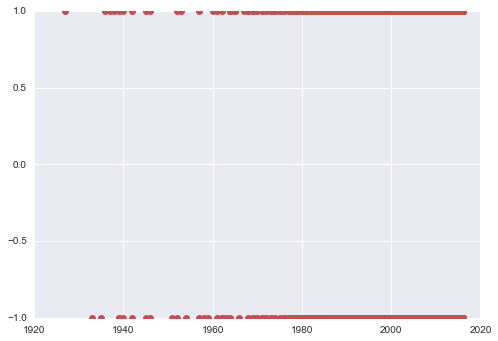

In [24]:
plt.plot(table1['Year'], table1['Sign'], 'ro')
plt.show()

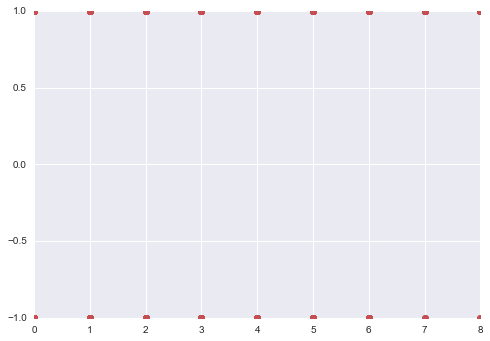

In [25]:
plt.plot(table1['Budget'], table1['Sign'], 'ro')
plt.show()

In [26]:
# Cross-Validation for selecting max_features
score_decision = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(max_features=(i+1)/20, random_state=0)
    score = cross_val_score(clf, X, Y, cv=5).mean()
    score_decision.append(score)
    print([i, score]) 

[0, 0.70776045755298866]
[1, 0.7185522899215846]
[2, 0.73600469285116588]
[3, 0.72021462892832189]
[4, 0.72477980693748323]
[5, 0.72810448495095792]
[6, 0.74594163266362434]
[7, 0.7555119434787485]
[8, 0.74554049740771733]
[9, 0.75715875466912808]
[10, 0.75258667540825219]
[11, 0.75218036421355916]
[12, 0.76088888122083131]
[13, 0.75881160445475793]
[14, 0.74594853391533888]
[15, 0.75175938785897289]
[16, 0.75051716255035761]
[17, 0.74760483432682601]
[18, 0.7571527160738778]
[19, 0.75341913889631729]


In [27]:
max_feature = [(x+1)/20 for x in range(20)]
DecisionTree = pd.DataFrame()
DecisionTree["max_features"] = max_feature
DecisionTree["precision"] = score_decision
DecisionTree.to_csv("Decision Tree Precision.csv")

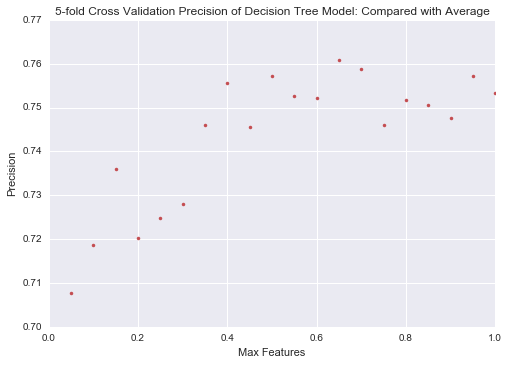

In [29]:
plt.plot(max_feature, score_decision, 'r.')
plt.xlabel('Max Features')
plt.ylabel('Precision')
plt.title('5-fold Cross Validation Precision of Decision Tree Model: Compared with Average')
plt.savefig('DecisionTree Compared with Average.pdf')
plt.show()

In [32]:
clf = tree.DecisionTreeClassifier(max_features=0.5, random_state=0)
clf.fit(X, Y)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     class_names=["Lower than Average", "Higher than Average"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision Tree Compared with Average.png')
#plt.savefig('Decision Tree Compared with Average.pdf')
#display(Image(graph.create_png()))

0: 0.73015674468
1: 0.737631662943
2: 0.745931280786
3: 0.746344493232
4: 0.746760293648
5: 0.749248194891
6: 0.751322883688
7: 0.74634276792
8: 0.747587581198
9: 0.746341905263
10: 0.743438203604
11: 0.746344493232
12: 0.748419182029
13: 0.748419182029
14: 0.750495596139
15: 0.750081521036
16: 0.749666583277
17: 0.747591031823
18: 0.747591031823
19: 0.748834982445
20: 0.749249920204
21: 0.748834119788
22: 0.748418319373
23: 0.749663132651
24: 0.749661407338
25: 0.749663132651
26: 0.75007807041
27: 0.751738684104
28: 0.752153621863
29: 0.750493870826
30: 0.749249057548
31: 0.750078933066
32: 0.750908808585
33: 0.750493870826
34: 0.750493870826
35: 0.751323746344
36: 0.750493008169
37: 0.750493008169
38: 0.75007807041
39: 0.749664857964
40: 0.750495596139
41: 0.751324609001
42: 0.751324609001
43: 0.750078933066
44: 0.750494733482
45: 0.750909671242
46: 0.750908808585
47: 0.750493870826
48: 0.750493870826
49: 0.749247332235
Time elapsed: 7048.424377202988sec.



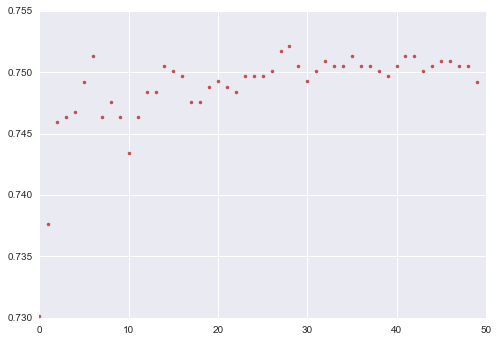

In [67]:
# Cross-Validation for selecting n_estimators 
start = time.time()
score = []
for i in range(50):
    clf = RandomForestClassifier(n_estimators=10*(i+1), min_samples_split=2, random_state=0)
    scores = cross_val_score(clf, X, Y, cv=5)
    score.append(scores.mean())
    print(str(i) + ": " + str(scores.mean()))
print("Time elapsed: " + str(time.time()-start) + "sec.\n")
plt.plot(range(50), score, 'r.')
plt.show()

In [68]:
n_estimators = [10*(x+1) for x in range(50)]
RandomForest = pd.DataFrame()
RandomForest["n_estimators"] = n_estimators
RandomForest["precision"] = score
RandomForest.to_csv("Random Forest Precision Compared with Average.csv")

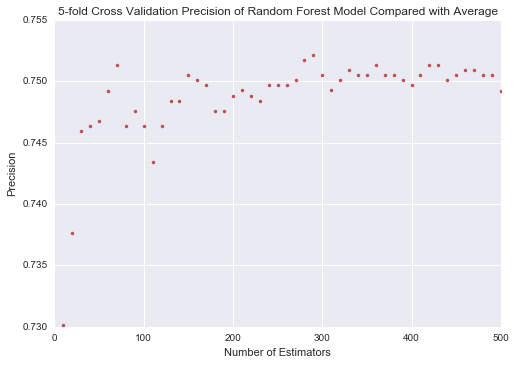

In [69]:
plt.plot(n_estimators, score, 'r.')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision')
plt.title('5-fold Cross Validation Precision of Random Forest Model Compared with Average')
plt.savefig('RandomForest Compared with Average.pdf')
plt.show()

In [ ]:
# Cross-Validation for selecting n_estimators and max_feature
start = time.time()
scores = []
n_estimators = []
max_features = []
for i in range(25):
    for j in range(5):
        clf = RandomForestClassifier(n_estimators=20*(i+1), max_features=(j+1)/5, min_samples_split=2, random_state=0)
        score = cross_val_score(clf, X, Y, cv=5).mean()
        n_estimators.append(i)
        max_features.append(j)
        scores.append(score)
        print([i, j, score])
print("Time elapsed: " + str(time.time()-start) + "sec.\n")

In [107]:
clf = RandomForestClassifier(n_estimators=250, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()

0.29015140787034766

In [50]:
clf = ExtraTreesClassifier(n_estimators=220, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()

0.32124161679559576